<a href="https://colab.research.google.com/github/gkdivya/EVA/blob/master/Session1/Assignment1A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 1A**

The assignment is to find and show (in separate code blocks):

> Horizontal Edge Detector

> 45 Degree Angle Detector (either)

> Blur Kernel

> Sharpen Kernel

> Identity function (doesn't do anything)




#### Reference code provided for Assignment 1A

In [0]:
# import the necessary packages
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

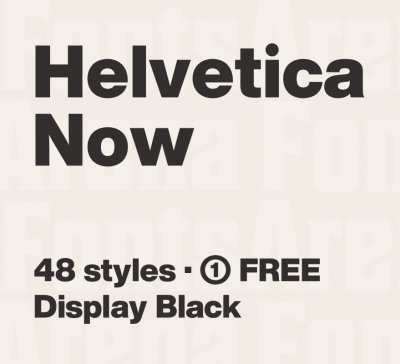

In [3]:
image = url_to_image("https://fontsarena-cd5e.kxcdn.com/wp-content/uploads/2019/04/helvetica-now-font-400x364.png")
cv2_imshow(image)

##### Below is the sample code provided for vertical edge detector

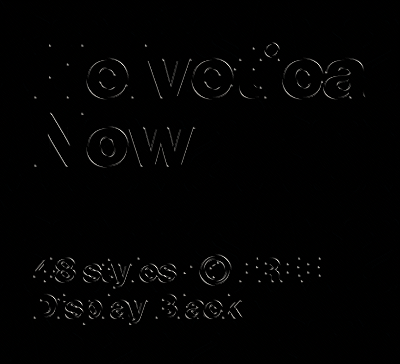

In [0]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[-1,0,1],[-1,0,1],[-1,0,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

Wanted a different kernel to detect vertical lines, Another vertical line detector

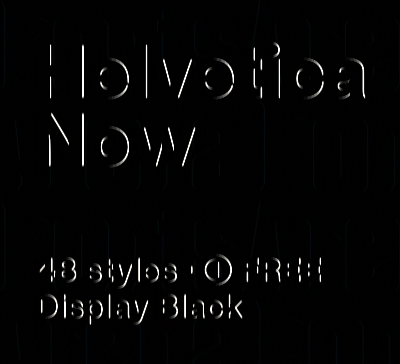

In [6]:
kernel = np.float32([[-1,1,0],[-1,1,0],[-1,1,0]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

##### Horizontal Edge detector

For Horizontal edge detector, let us inverse the values of the above kernel

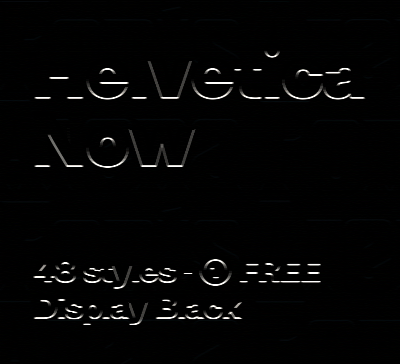

In [7]:
kernel = np.float32([[-1,-1,-1],[1,1,1],[0,0,0]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

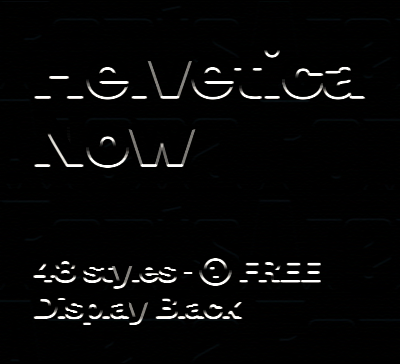

In [8]:
kernel = np.float32([[-1,-1,-1],[0,0,0],[1,1,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)